### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
nyc = pd.read_csv(r"C:\Users\WELCOME\Downloads\DOHMH_New_York_City_Restaurant_Inspection_Results_20250912.csv")
nyc

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50114537,MAMA'S CUPBOARD,Manhattan,42,WEST 42 STREET,10036.0,6469191465,NaN,01-01-1900,NaN,...,NaN,40.754068,-73.982321,105.0,4.0,8400.0,1085593.0,1.012570e+09,MN17,NaN
1,50164148,TIENDA CHICOJ,Queens,10840,ROOSEVELT AVE,11368.0,7189166374,NaN,01-01-1900,NaN,...,NaN,40.750845,-73.858280,404.0,21.0,40100.0,4307718.0,4.019960e+09,QN26,NaN
2,50169870,TEX'S CHICKEN & BURGERS,Queens,21712,MERRICK BLVD,11413.0,9178850048,NaN,01-01-1900,NaN,...,NaN,40.679915,-73.752087,413.0,31.0,35800.0,4279942.0,4.130110e+09,QN66,NaN
3,50132087,FANTASTIC BEASTS,Queens,36-10,UNION STREET,11354.0,2538807717,NaN,01-01-1900,NaN,...,NaN,40.763482,-73.828056,407.0,20.0,86900.0,4112354.0,4.049770e+09,QN22,NaN
4,50172040,BROAD STREET DELI,Manhattan,270,PARK AVENUE,10017.0,7043286780,NaN,01-01-1900,NaN,...,NaN,40.755634,-73.975109,105.0,4.0,9400.0,1035421.0,1.012830e+09,MN17,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290017,50121962,BURGER KING,Brooklyn,9006,CHURCH AVENUE,11236.0,7184985574,Hamburgers,06/17/2022,Violations were cited in the following area(s).,...,Pre-permit (Operational) / Initial Inspection,40.652872,-73.919806,317.0,42.0,88800.0,3103358.0,3.047110e+09,BK96,NaN
290018,50150281,MADMAN ESPRESSO,Manhattan,721,BROADWAY,10003.0,3477811121,Coffee/Tea,02-10-2025,Violations were cited in the following area(s).,...,Pre-permit (Operational) / Initial Inspection,40.729306,-73.993502,102.0,2.0,5700.0,1088447.0,1.005470e+09,MN23,NaN
290019,40949905,KA WAH BAKERY,Manhattan,9,ELDRIDGE STREET,10002.0,2122260133,Chinese,07/13/2022,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.714660,-73.993770,103.0,1.0,1600.0,1003772.0,1.002920e+09,MN27,NaN
290020,50121766,CROSSBAR / SOCCER POST UPPER WESTSIDE,Manhattan,250,WEST 86 STREET,10024.0,2126522238,American,11/14/2022,Violations were cited in the following area(s).,...,Administrative Miscellaneous / Initial Inspection,40.788484,-73.976942,107.0,6.0,17100.0,1081052.0,1.012330e+09,MN12,NaN


### Data Understanding


In [3]:
nyc['CRITICAL FLAG'].unique()

array(['Not Applicable', 'Critical', 'Not Critical'], dtype=object)

In [4]:
nyc['Location Point1'].unique()

array([nan])

In [5]:
nyc.shape

(290022, 27)

In [6]:
nyc.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA', 'Location Point1'],
      dtype='object')

In [7]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290022 entries, 0 to 290021
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  290022 non-null  int64  
 1   DBA                    290015 non-null  object 
 2   BORO                   290022 non-null  object 
 3   BUILDING               289516 non-null  object 
 4   STREET                 290021 non-null  object 
 5   ZIPCODE                287205 non-null  float64
 6   PHONE                  290016 non-null  object 
 7   CUISINE DESCRIPTION    286337 non-null  object 
 8   INSPECTION DATE        290022 non-null  object 
 9   ACTION                 286337 non-null  object 
 10  VIOLATION CODE         284189 non-null  object 
 11  VIOLATION DESCRIPTION  284189 non-null  object 
 12  CRITICAL FLAG          290022 non-null  object 
 13  SCORE                  274080 non-null  float64
 14  GRADE                  141303 non-nu

In [8]:
nyc.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50114537,MAMA'S CUPBOARD,Manhattan,42,WEST 42 STREET,10036.0,6469191465,NaN,01-01-1900,NaN,...,NaN,40.754068,-73.982321,105.0,4.0,8400.0,1085593.0,1.012570e+09,MN17,NaN
1,50164148,TIENDA CHICOJ,Queens,10840,ROOSEVELT AVE,11368.0,7189166374,NaN,01-01-1900,NaN,...,NaN,40.750845,-73.858280,404.0,21.0,40100.0,4307718.0,4.019960e+09,QN26,NaN
2,50169870,TEX'S CHICKEN & BURGERS,Queens,21712,MERRICK BLVD,11413.0,9178850048,NaN,01-01-1900,NaN,...,NaN,40.679915,-73.752087,413.0,31.0,35800.0,4279942.0,4.130110e+09,QN66,NaN
3,50132087,FANTASTIC BEASTS,Queens,36-10,UNION STREET,11354.0,2538807717,NaN,01-01-1900,NaN,...,NaN,40.763482,-73.828056,407.0,20.0,86900.0,4112354.0,4.049770e+09,QN22,NaN
4,50172040,BROAD STREET DELI,Manhattan,270,PARK AVENUE,10017.0,7043286780,NaN,01-01-1900,NaN,...,NaN,40.755634,-73.975109,105.0,4.0,9400.0,1035421.0,1.012830e+09,MN17,NaN


In [9]:
nyc.dtypes

CAMIS                      int64
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                  float64
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
Latitude                 float64
Longitude                float64
Community Board          float64
Council District         float64
Census Tract             float64
BIN                      float64
BBL                      float64
NTA                       object
Location Point1          float64
dtype: object

In [10]:
nyc.describe()

,CAMIS,ZIPCODE,SCORE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,Location Point1
count,2.900220e+05,287205.000000,274080.000000,289611.000000,289611.000000,286401.000000,286402.000000,286402.000000,2.850080e+05,2.892170e+05,0.0
mean,4.795983e+07,10707.842708,24.825354,40.331673,-73.221992,255.023453,20.682429,29820.183515,2.583598e+06,2.478372e+09,NaN
std,3.816186e+06,594.910573,18.609477,3.997054,7.255987,130.239113,15.728184,31209.112414,1.351919e+06,1.335642e+09,NaN
min,3.007544e+07,8512.000000,0.000000,0.000000,-74.249101,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00,NaN
25%,5.000162e+07,10023.000000,12.000000,40.685550,-73.988773,106.000000,4.000000,8000.000000,1.051612e+06,1.011210e+09,NaN
50%,5.008657e+07,11101.000000,21.000000,40.732204,-73.956292,302.000000,20.000000,17300.000000,3.021542e+06,3.008010e+09,NaN
75%,5.012432e+07,11232.000000,33.000000,40.761200,-73.895103,401.000000,34.000000,42400.000000,4.010277e+06,4.006140e+09,NaN
max,5.017636e+07,28217.000000,175.000000,40.912822,0.000000,595.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09,NaN


### Data Cleaning

In [11]:
nyc = nyc.drop_duplicates()

In [12]:
nyc.isnull().sum()

CAMIS                         0
DBA                           7
BORO                          0
BUILDING                    506
STREET                        1
ZIPCODE                    2811
PHONE                         6
CUISINE DESCRIPTION        3685
INSPECTION DATE               0
ACTION                     3685
VIOLATION CODE             5833
VIOLATION DESCRIPTION      5833
CRITICAL FLAG                 0
SCORE                     15942
GRADE                    148713
GRADE DATE               156823
RECORD DATE                   0
INSPECTION TYPE            3685
Latitude                    411
Longitude                   411
Community Board            3615
Council District           3614
Census Tract               3614
BIN                        5008
BBL                         805
NTA                        3615
Location Point1          290016
dtype: int64

In [13]:
nyc_df = pd.DataFrame(nyc)
nyc_df

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50114537,MAMA'S CUPBOARD,Manhattan,42,WEST 42 STREET,10036.0,6469191465,NaN,01-01-1900,NaN,...,NaN,40.754068,-73.982321,105.0,4.0,8400.0,1085593.0,1.012570e+09,MN17,NaN
1,50164148,TIENDA CHICOJ,Queens,10840,ROOSEVELT AVE,11368.0,7189166374,NaN,01-01-1900,NaN,...,NaN,40.750845,-73.858280,404.0,21.0,40100.0,4307718.0,4.019960e+09,QN26,NaN
2,50169870,TEX'S CHICKEN & BURGERS,Queens,21712,MERRICK BLVD,11413.0,9178850048,NaN,01-01-1900,NaN,...,NaN,40.679915,-73.752087,413.0,31.0,35800.0,4279942.0,4.130110e+09,QN66,NaN
3,50132087,FANTASTIC BEASTS,Queens,36-10,UNION STREET,11354.0,2538807717,NaN,01-01-1900,NaN,...,NaN,40.763482,-73.828056,407.0,20.0,86900.0,4112354.0,4.049770e+09,QN22,NaN
4,50172040,BROAD STREET DELI,Manhattan,270,PARK AVENUE,10017.0,7043286780,NaN,01-01-1900,NaN,...,NaN,40.755634,-73.975109,105.0,4.0,9400.0,1035421.0,1.012830e+09,MN17,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290017,50121962,BURGER KING,Brooklyn,9006,CHURCH AVENUE,11236.0,7184985574,Hamburgers,06/17/2022,Violations were cited in the following area(s).,...,Pre-permit (Operational) / Initial Inspection,40.652872,-73.919806,317.0,42.0,88800.0,3103358.0,3.047110e+09,BK96,NaN
290018,50150281,MADMAN ESPRESSO,Manhattan,721,BROADWAY,10003.0,3477811121,Coffee/Tea,02-10-2025,Violations were cited in the following area(s).,...,Pre-permit (Operational) / Initial Inspection,40.729306,-73.993502,102.0,2.0,5700.0,1088447.0,1.005470e+09,MN23,NaN
290019,40949905,KA WAH BAKERY,Manhattan,9,ELDRIDGE STREET,10002.0,2122260133,Chinese,07/13/2022,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.714660,-73.993770,103.0,1.0,1600.0,1003772.0,1.002920e+09,MN27,NaN
290020,50121766,CROSSBAR / SOCCER POST UPPER WESTSIDE,Manhattan,250,WEST 86 STREET,10024.0,2126522238,American,11/14/2022,Violations were cited in the following area(s).,...,Administrative Miscellaneous / Initial Inspection,40.788484,-73.976942,107.0,6.0,17100.0,1081052.0,1.012330e+09,MN12,NaN


### Dropping features that contains too many missing values

In [14]:
nyc_df = nyc_df.drop(['INSPECTION DATE'], axis = 1)
nyc_df = nyc_df.drop("Location Point1", axis = 1)
nyc_df = nyc_df.drop(['GRADE DATE'], axis = 1)

### Dropping unwanted features

In [15]:
nyc_df = nyc_df.drop(["CUISINE DESCRIPTION"], axis = 1)
nyc_df = nyc_df.drop(['DBA'], axis = 1)
nyc_df = nyc_df.drop(['BORO'], axis = 1)
nyc_df = nyc_df.drop(['CRITICAL FLAG'], axis = 1)
nyc_df = nyc_df.drop(['RECORD DATE'], axis = 1)
nyc_df = nyc_df.drop(['INSPECTION TYPE'], axis = 1)
nyc_df = nyc_df.drop(['BUILDING'], axis = 1)
nyc_df = nyc_df.drop(['VIOLATION CODE'], axis = 1)
nyc_df = nyc_df.drop(['VIOLATION DESCRIPTION'], axis = 1)

In [16]:
nyc_df.isnull().sum()

CAMIS                    0
STREET                   1
ZIPCODE               2811
PHONE                    6
ACTION                3685
SCORE                15942
GRADE               148713
Latitude               411
Longitude              411
Community Board       3615
Council District      3614
Census Tract          3614
BIN                   5008
BBL                    805
NTA                   3615
dtype: int64

### Filling Categorical features with 'Not Available'

In [17]:
nyc_df['STREET'] = nyc_df['STREET'].fillna('Not Available')
nyc_df['PHONE'] = nyc_df['PHONE'].fillna('Not Available')
nyc_df['ACTION'] = nyc_df['ACTION'].fillna('Not Available')
nyc_df['GRADE'] = nyc_df['GRADE'].fillna('Not Available')
nyc_df['NTA'] = nyc_df['NTA'].fillna('Not Available')

### Filling Numerical features with mean(Average) value

In [18]:
nyc_df['ZIPCODE'] = nyc_df['ZIPCODE'].fillna(nyc_df['ZIPCODE'].mean())
nyc_df['SCORE'] = nyc_df['SCORE'].fillna(nyc_df['SCORE'].mean())
nyc_df['Latitude'] = nyc_df['Latitude'].fillna(nyc_df['Latitude'].mean())
nyc_df['Longitude'] = nyc_df['Longitude'].fillna(nyc_df['Longitude'].mean())
nyc_df['Community Board'] = nyc_df['Community Board'].fillna(nyc_df['Community Board'].mean())
nyc_df['Council District'] = nyc_df['Council District'].fillna(nyc_df['Council District'].mean())
nyc_df['Census Tract'] = nyc_df['Census Tract'].fillna(nyc_df['Census Tract'].mean())
nyc_df['BIN'] = nyc_df['BIN'].fillna(nyc_df['BIN'].mean())
nyc_df['BBL'] = nyc_df['BBL'].fillna(nyc_df['BBL'].mean())

In [19]:
nyc_df.isnull().sum().sum()

np.int64(0)

In [20]:
nyc_df.shape

(290016, 15)

### Converting appropriate datatypes

In [21]:
nyc_df['PHONE'] = pd.to_numeric(nyc_df['PHONE'] , errors = 'coerce')
nyc_df['SCORE'] = pd.to_numeric(nyc_df['PHONE'] , errors = 'coerce')
nyc_df['Community Board'] = pd.to_numeric(nyc_df['Community Board'] , errors = 'coerce')
nyc_df['Council District'] = pd.to_numeric(nyc_df['Council District'] , errors = 'coerce')
nyc_df['Census Tract'] = pd.to_numeric(nyc_df['Census Tract'] , errors = 'coerce')

In [22]:
nyc_df.dtypes

CAMIS                 int64
STREET               object
ZIPCODE             float64
PHONE               float64
ACTION               object
SCORE               float64
GRADE                object
Latitude            float64
Longitude           float64
Community Board     float64
Council District    float64
Census Tract        float64
BIN                 float64
BBL                 float64
NTA                  object
dtype: object

In [23]:
nyc_df.columns

Index(['CAMIS', 'STREET', 'ZIPCODE', 'PHONE', 'ACTION', 'SCORE', 'GRADE',
       'Latitude', 'Longitude', 'Community Board', 'Council District',
       'Census Tract', 'BIN', 'BBL', 'NTA'],
      dtype='object')

In [24]:
# Community Board, Council District, Census Tract, BIN, BBL are Categorical Codes.So, there is no need to find outliers in these Features.

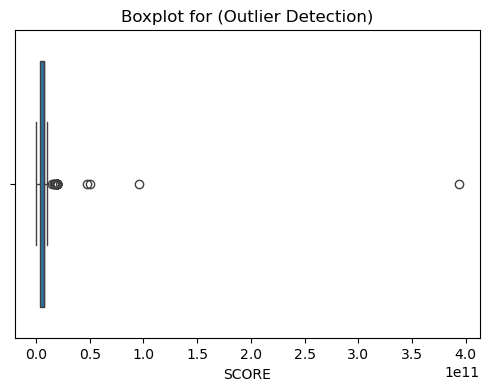

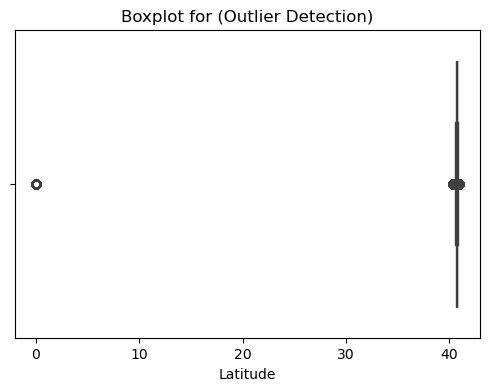

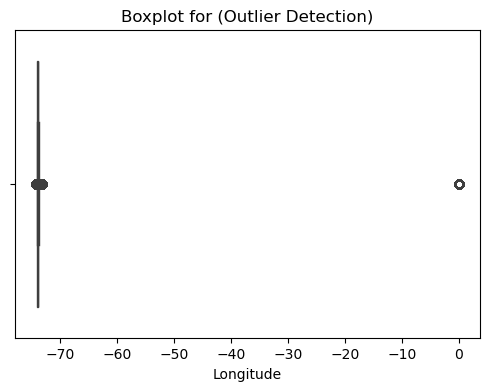

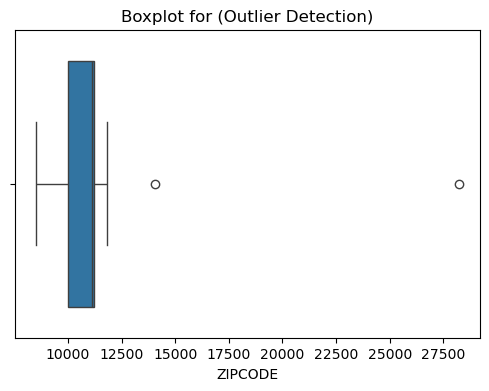

In [25]:
numeric_cols = ["SCORE", "Latitude", "Longitude", "ZIPCODE"]
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=nyc_df[col])
    plt.title("Boxplot for (Outlier Detection)")
    plt.show()

### All the numeric columns have outliers. Treating outliers with median values using for loop

In [26]:
numeric_cols = ["SCORE", "Latitude", "Longitude", "ZIPCODE"]

for col in numeric_cols:
    Q1 = nyc_df[col].quantile(0.25)
    Q3 = nyc_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    median_val = nyc_df[col].median()

    print(f"{col} : Lower Limit:{lower_limit}, Upper Limit:{upper_limit}, Median:{median_val}")

# Replace outliers with median
    nyc_df.loc[(nyc_df[col] < lower_limit) | (nyc_df[col] > upper_limit), col] = median_val

SCORE : Lower Limit:-2095497191.75, Upper Limit:12758173698.25, Median:7182586943.0
Latitude : Lower Limit:40.570702440000005, Upper Limit:40.875467959999995, Median:40.73211362
Longitude : Lower Limit:-74.13016669500001, Upper Limit:-73.753028255, Median:-73.95616202
ZIPCODE : Lower Limit:8211.0, Upper Limit:13043.0, Median:11101.0


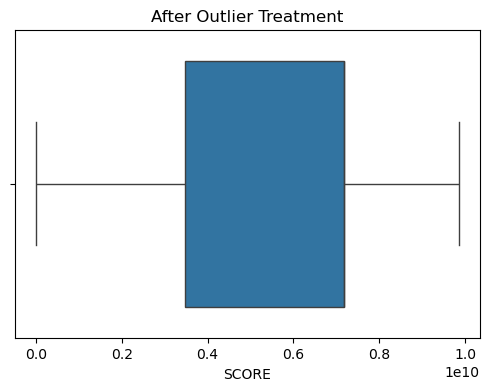

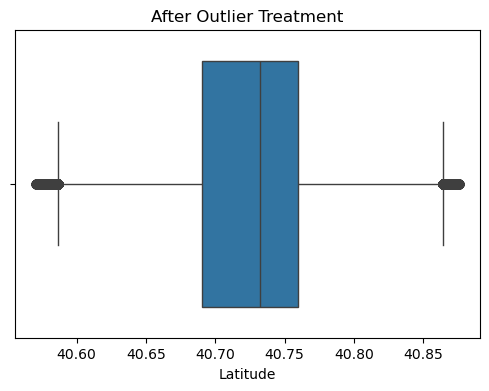

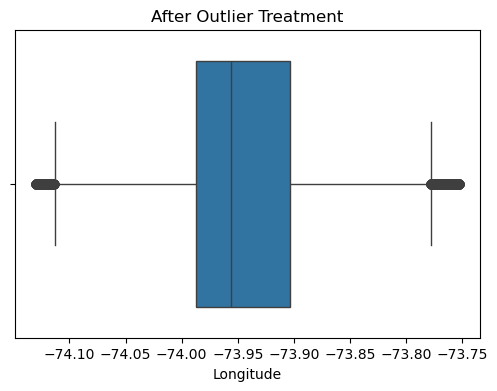

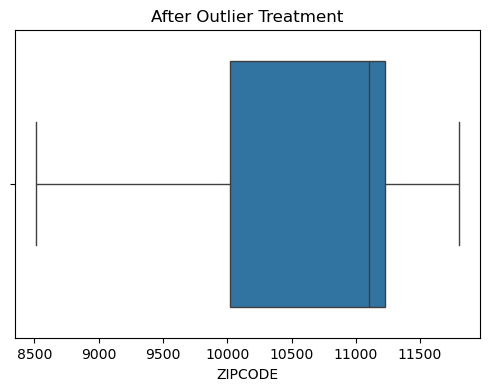

In [27]:
numeric_cols = ["SCORE", "Latitude", "Longitude", "ZIPCODE"]
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=nyc_df[col])
    plt.title("After Outlier Treatment")
    plt.show()

## Statistical Test

### 1.Independent Sample t-test

### Comparing SCORE between GRADE A and GRADE B Restaurants
### Null Hypothesis Ho : No Significant difference between GRADE A and GRADE B SCORES
### Alternate Hypothesis Ha : Significant difference between GRADE A and GRADE B SCORES

In [28]:
from scipy.stats import ttest_ind

group_A = nyc_df[nyc_df['GRADE'] == 'A']['SCORE']
group_B = nyc_df[nyc_df['GRADE'] == 'B']['SCORE']

t_stat, p_value = ttest_ind(group_A, group_B, nan_policy='omit')

print("Independent T-Test")
print("T-test statistic:", t_stat)
print("P-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject H0 : No Significant difference between Grade A and Grade B scores")
else:
    print("Failed to reject H0 : Significant difference between Grade A and Grade B scores")

Independent T-Test
T-test statistic: -5.948297735427174
P-value: 2.7173535029864953e-09
Reject H0 : No Significant difference between Grade A and Grade B scores


### Insights :
### The SCORES of GRADE A and GRADE B have significant differences

### 2.Chi Square Test

### Taking two categorical Features ACTION and GRADE to check they are independent or not
### Null Hypothesis Ho : ACTION and GRADE are independent
### Alternate Hypothesis Ha : ACTION and GRADE are dependent

In [29]:
from scipy import stats
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(nyc_df['ACTION'], nyc_df['GRADE'])

chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print("Contingency Table:\n", contingency_table)
print("\nChi-Square Statistic:", chi2_stat)
print("\nP-value:", p_val)
print("\nDegrees of Freedom:", dof)
print("\nExpected Frequencies:\n", expected)
print("\n")

alpha = 0.05

if p_value < alpha :
    print("Reject H0 : ACTION and GRADE are Independent")
else:
    print("Failed to reject H0 : ACTION and GRADE are not Independent")

Contingency Table:
 GRADE                                                   A      B      C     N  \
ACTION                                                                          
Establishment Closed by DOHMH. Violations were ...      0      0     16   312   
Establishment re-closed by DOHMH.                       0      0      0     0   
Establishment re-opened by DOHMH.                       8      2    394     5   
No violations were recorded at the time of this...    410      0      0    24   
Not Available                                           0      0      0     0   
Violations were cited in the following area(s).     95547  17644  11746  7771   

GRADE                                               Not Available    P     Z  
ACTION                                                                        
Establishment Closed by DOHMH. Violations were ...           9746    0     0  
Establishment re-closed by DOHMH.                            1325    0     0  
Establishment r

### Insights:
### ACTION and GRADE are dependent

## EXPLORATORY DATA ANALYSIS - EDA

## 1.Univariate Analysis

### Numeric Univariate Analysis

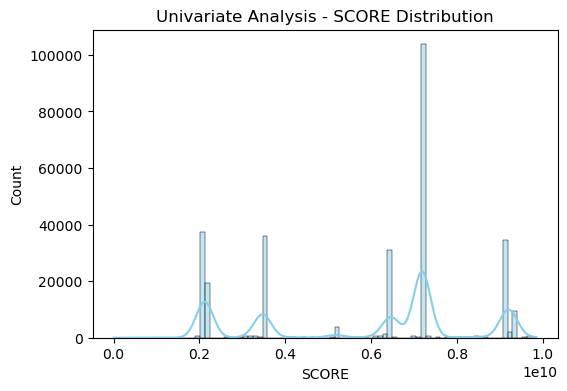

In [30]:
plt.figure(figsize=(6,4))
sns.histplot(nyc_df["SCORE"], kde=True, color="skyblue")
plt.title("Univariate Analysis - SCORE Distribution")
plt.show()

### Insights
- The SCORE values appear to be highly skewed with extreme peaks at certain points, suggesting possible data entry errors or outliers.
- Instead of a smooth distribution, the plot shows spikes, which might mean scores are not continuous but clustered around specific values.

### Categorical Univariate Analysis

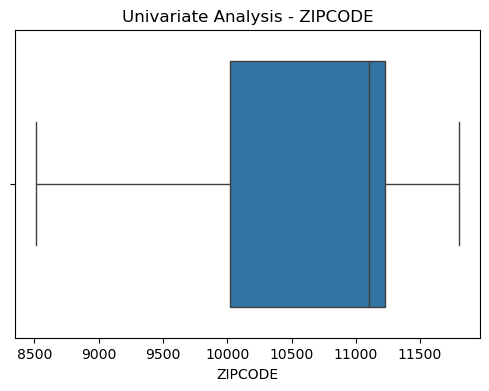

In [31]:
plt.figure(figsize=(6,4))
sns.boxplot(x=nyc_df["ZIPCODE"])
plt.title("Univariate Analysis - ZIPCODE")
plt.show()

### Insights

- The Median is around 11200

- The Interquartile Range IQR is between 10000 and 11400

## 2.Bivariate Analysis

### Numerical vs Numerical
### Latitude and SCORE

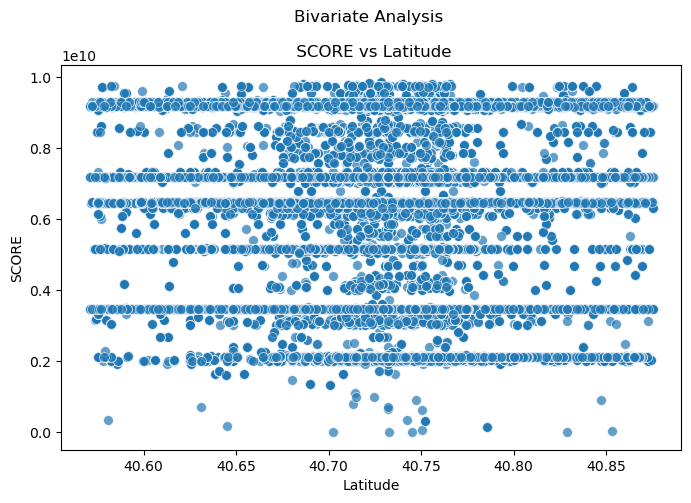

In [32]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Latitude', y='SCORE', data=nyc_df, s=50, alpha=0.7)
plt.title("Bivariate Analysis \n\n SCORE vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("SCORE")
plt.show()

### Insights
- SCORE is scattered in bands and does not vary strongly with Latitude, showing weak or no clear relationship.

### Categorical vs Numerical
### GRADE and SCORE

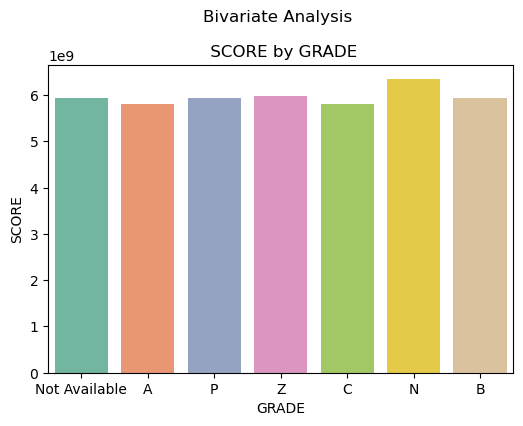

In [33]:
plt.figure(figsize=(6,4))
sns.barplot(x='GRADE', y='SCORE', data=nyc_df, estimator='mean', ci=None, palette="Set2")
plt.title("Bivariate Analysis \n\n SCORE by GRADE")
plt.ylabel("SCORE")
plt.xlabel("GRADE")
plt.show()

### Insights
- The SCORE increases with higher GRADE, showing that the grading system aligns well with inspection performance
- The SCORE is Minimum in GRADE C and the Maximum in GRADE N

## 3.Multivariate Analysis

### Numerical vs Two categorical
### SCORE - Numerical ,  GRADE and ACTION - Categorical

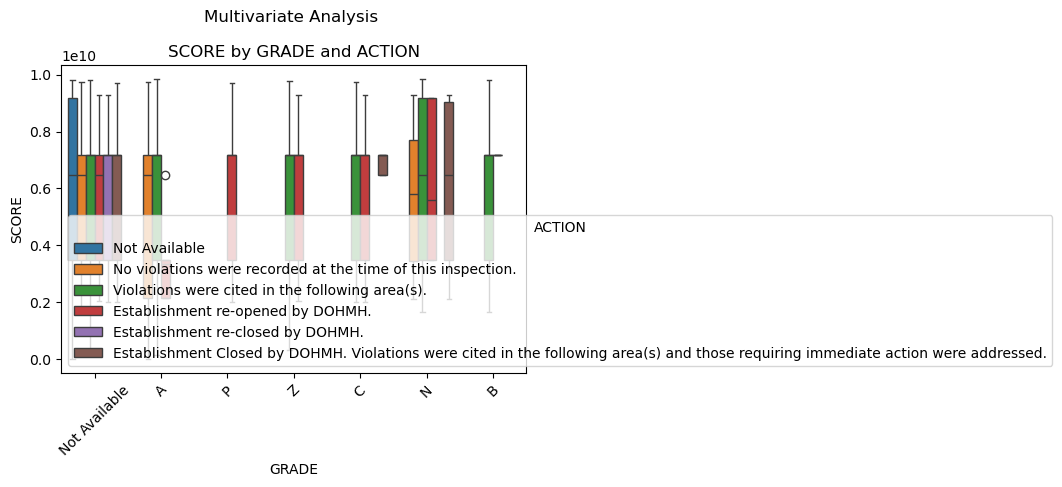

In [34]:
plt.figure(figsize=(6,4))
sns.boxplot(x='GRADE', y='SCORE', hue='ACTION', data=nyc_df)
plt.xticks(rotation=45)
plt.title("Multivariate Analysis \n\nSCORE by GRADE and ACTION")
plt.ylabel("SCORE")
plt.show()

### Insights

- Grade A has the lowest scores, indicating better compliance
- Grades B and C show higher scores and more severe actions
- Actions like “Closed” or “Re-closed” are linked to high violation scores, regardless of grade
- “Not Available” grade has wide score variation — possibly inconsistent or missing data

### Two Numerical and one Categorical
### SCORE and Latitude - Numerical , GRADE - Categorical

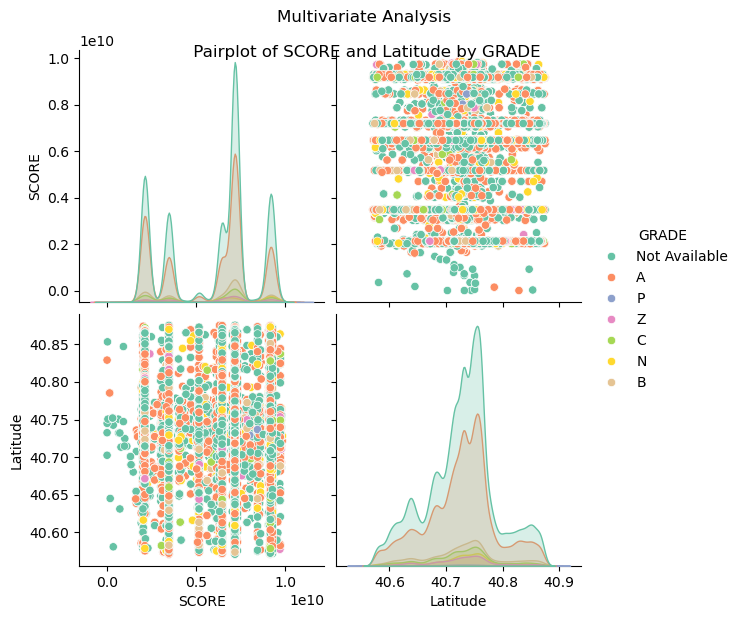

In [35]:
columns = ['SCORE', 'Latitude', 'GRADE']

sns.pairplot(nyc_df[columns], hue='GRADE', palette='Set2', diag_kind='kde', height=3)
plt.suptitle("Multivariate Analysis \n\n Pairplot of SCORE and Latitude by GRADE \n\n\n", y=1.02)
plt.show()

### Insights
- SCORE values are spread across different Grades without a clear pattern by Latitude
- Distribution shows multiple peaks in SCORE, suggesting clustering or categorical effects
- Grade categories are spread evenly, meaning GRADE may not strongly explain SCORE vs Latitude relationship

## CORRELATION HEAT MAP

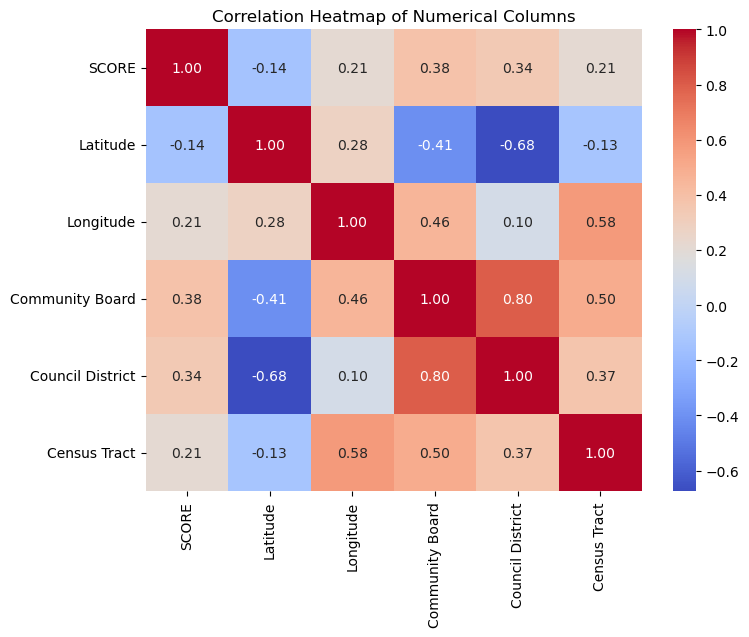

In [36]:
num_cols = ['SCORE', 'Latitude', 'Longitude', 'Community Board', 'Council District', 'Census Tract']
corr = nyc_df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

### Insights
- SCORE shows weak to moderate positive correlation with Community Board (0.38) and Council District (0.34).
- Latitude has a strong negative correlation with Council District (-0.68).
- Community Board and Council District are highly correlated (0.80), which may indicate multicollinearity.